In [26]:
import pandas as pd
house = pd.read_csv("train.csv")
house.corr()


,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
MSSubClass,1.000000,0.532233,0.471136,0.572252,0.415910,0.246813,0.212010,0.393934,0.445768,0.423389,...,0.329673,0.391700,0.253413,0.283353,0.510706,0.408647,0.438262,0.397369,0.387789,0.476982
Neighborhood,0.532233,1.000000,0.667647,0.683095,0.521638,0.400196,0.368029,0.631870,0.576118,0.629227,...,0.513701,0.566358,0.282979,0.315569,0.456575,0.579489,0.466576,0.585252,0.529629,0.696882
OverallQual,0.471136,0.667647,1.000000,0.665203,0.552825,0.449358,0.410238,0.726278,0.568969,0.644946,...,0.552153,0.673331,0.423438,0.396765,0.420713,0.574261,0.491404,0.628715,0.562022,0.790982
YearBuilt,0.572252,0.683095,0.665203,1.000000,0.652419,0.420443,0.298983,0.638206,0.699337,0.707715,...,0.555510,0.575836,0.246057,0.214032,0.519992,0.768672,0.554784,0.570728,0.523139,0.619545
YearRemodAdd,0.415910,0.521638,0.552825,0.652419,1.000000,0.310870,0.193044,0.570870,0.551916,0.545541,...,0.452501,0.611669,0.217923,0.162493,0.387933,0.617250,0.446760,0.433995,0.390554,0.535370
MasVnrType,0.246813,0.400196,0.449358,0.420443,0.310870,1.000000,0.579165,0.415825,0.310319,0.393052,...,0.305025,0.362377,0.194912,0.199416,0.315218,0.343755,0.323321,0.429343,0.380290,0.426997
MasVnrArea,0.212010,0.368029,0.410238,0.298983,0.193044,0.579165,1.000000,0.349637,0.209916,0.314065,...,0.266274,0.285190,0.280041,0.247906,0.221484,0.229848,0.251678,0.404375,0.372567,0.475241
ExterQual,0.393934,0.631870,0.726278,0.638206,0.570870,0.415825,0.349637,1.000000,0.597832,0.638241,...,0.497192,0.716122,0.308004,0.249335,0.378696,0.590883,0.482143,0.557218,0.495778,0.682639
Foundation,0.445768,0.576118,0.568969,0.699337,0.551916,0.310319,0.209916,0.597832,1.000000,0.621976,...,0.462312,0.533146,0.180213,0.113338,0.401139,0.644742,0.487728,0.458128,0.398155,0.505503
BsmtQual,0.423389,0.629227,0.644946,0.707715,0.545541,0.393052,0.314065,0.638241,0.621976,1.000000,...,0.523471,0.562345,0.238832,0.227714,0.424760,0.642954,0.525068,0.545306,0.458693,0.635361


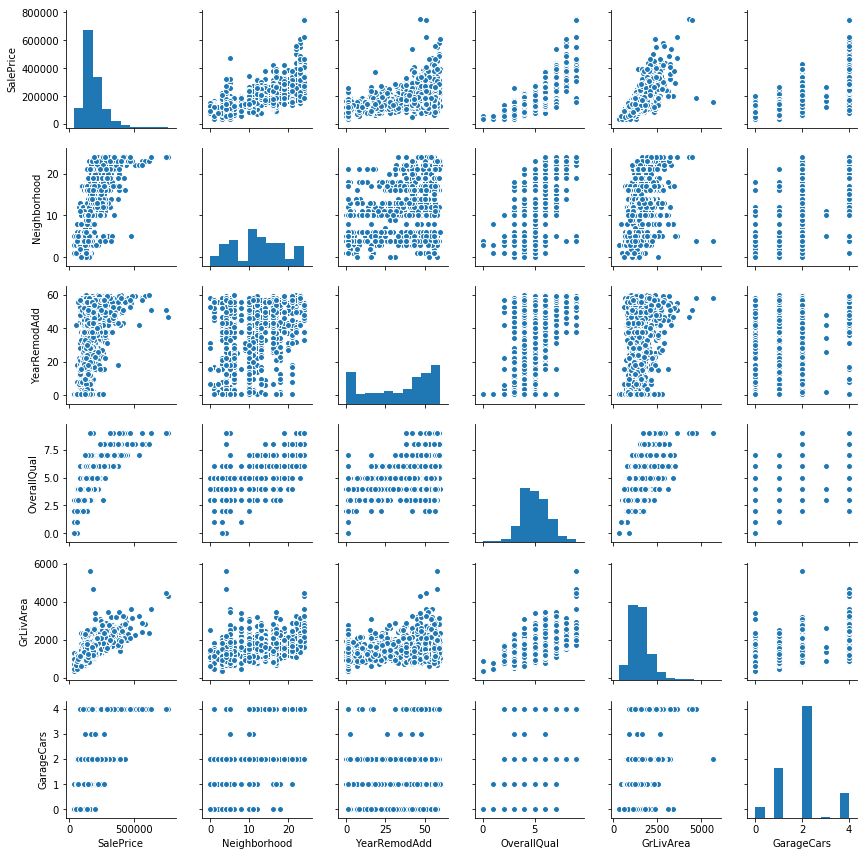

In [27]:
import matplotlib.pyplot as plt
house_pickup = house.loc[:, ['SalePrice', 'Neighborhood', 'YearRemodAdd', 'OverallQual', 'GrLivArea', 'GarageCars']]
import seaborn as sns
sns.pairplot(house_pickup, size=2.0)
plt.show()

In [85]:
import numpy as np
area = house.loc[:, ['GrLivArea']].values
neighbourhood = house.loc[:, ['Neighborhood']].values
qual = house.loc[:, ['OverallQual']]
garage = house.loc[:, ['GarageCars']].values
remod = house.loc[:, ['YearRemodAdd']].values
y = house.loc[:, ['SalePrice']].values
from sklearn.preprocessing import PolynomialFeatures
double = PolynomialFeatures(degree=4) 
quad = PolynomialFeatures(degree=10) 
triple = PolynomialFeatures(degree=3)
garag = PolynomialFeatures(degree=1)
remo = PolynomialFeatures(degree=1)

qual_quad = quad.fit_transform(qual) 
neighbourhood = double.fit_transform(neighbourhood)
area = triple.fit_transform(area)
garage = garag.fit_transform(garage)
remod = remo.fit_transform(remod)

X = np.hstack((qual_quad, neighbourhood, area, remod, garage))
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

print('train: %.3f' % adjusted(model_lin.score(X_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_lin.score(X_test, y_test), len(y_test), 4))

train: 0.840
test : 0.833


In [87]:
from sklearn.linear_model import Ridge                        # Ridge回帰のクラスを読み込み
model_ridge = Ridge(alpha=40)                               # Ridge回帰のインスタンスを生成
model_ridge.fit(X_train, y_train)                                     # データを学習させる

print('train: %.3f' % adjusted(model_ridge.score(X_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_ridge.score(X_test, y_test), len(y_test), 4))

train: 0.840
test : 0.833


In [88]:
test = pd.read_csv("test.csv")
area_test = test.loc[:, ['GrLivArea']].values
neighbourhood_test = test.loc[:, ['Neighborhood']].values
qual_test = test.loc[:, ['OverallQual']]
garage = test.loc[:, ['GarageCars']].values
remod = test.loc[:, ['YearRemodAdd']].values
qual_quad_test = quad.fit_transform(qual_test) 
neighbourhood_test = double.fit_transform(neighbourhood_test)
area_test = triple.fit_transform(area_test)
garage = garag.fit_transform(garage)
remod = remo.fit_transform(remod)
test_use = np.hstack((qual_quad_test, neighbourhood_test, area_test, garage, remod))
df_out = pd.read_csv('test.csv')
df_out['SalePrice']= model_ridge.predict(test_use)
df_out['Id'] = np.arange(1461,1461+len(df_out))
df_out[['Id','SalePrice']].to_csv('houseprice_submit.csv', index = False)

In [89]:
df_out = pd.read_csv('test.csv')
df_out['SalePrice']= model_ridge.predict(test_use)
df_out['Id'] = np.arange(1461,1461+len(df_out))
df_out[['Id','SalePrice']].to_csv('houseprice_submit.csv', index = False)

In [82]:
from sklearn.linear_model import ElasticNet                 # ElasticNetのクラスを読み込み
model_en= ElasticNet(alpha=50, l1_ratio=0.7)              # ElasticNetのインスタンスを生成
model_en.fit(X_train, y_train) 

print('train: %.3f' % adjusted(model_en.score(X_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_en.score(X_test, y_test), len(y_test), 4))

train: 0.832
test : 0.830


/Users/mqbssra6/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [1]:
df_out = pd.read_csv('test.csv')
df_out['SalePrice']= model_ridge.predict(test_use)
df_out['Id'] = np.arange(1461,1461+len(df_out))
df_out[['Id','SalePrice']].to_csv('houseprice_submit.csv', index = False)

NameError: name 'pd' is not defined

In [2]:
from sklearn.linear_model import Ridge                        # Ridge回帰のクラスを読み込み
model_ridge = Ridge(alpha=40)                               # Ridge回帰のインスタンスを生成
model_ridge.fit(X_train, y_train)                                     # データを学習させる

print('train: %.3f' % adjusted(model_ridge.score(X_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_ridge.score(X_test, y_test), len(y_test), 4))

NameError: name 'X_train' is not defined